# Capstone Project - The Battle of Neighbourhoods

#### Christy Chen

#### 2019 Septemeber

## 1. Introduction

### 1.1 Background

Company ABC (the "Company") is a China-based Express Delivery Company who started their business about 5 years ago. With the rapid expanding trade between Canada and China, they foresee the potential profitability to open an international branch in Canada. Currently the Express Delivery Market is mainly lead by big corporate (e.g. FedEx, Canada Post, etc.). Considering the high shipping cost for individual or small business orders, the company built a strategy to only focus on China – Canada delivery and provide a more friendly rate to attract customer with small orders from the market. The company plans to open the first business in Ontario, and then depends on how the P&Ls within next 5 years. The main reason they choose Ontario as for it's being Canada's leading manufacturing province, and also tourism contributes heavily to the economy.

### 1.2 Business Problem

Currently, the Company had determined to open a new international Express Delivery branch in GTA, Ontario, with main focus on providing products & services to both individual and small business owners, and also thinking offering door-to-door service that will attract customers that would require more assistance.
The Company now has two places in mind: Markham or Mississauga. They need to determine which City and where they should open the branch that will allow them to attract more business. The ideal site location should take the following requirement into consideration (if not all, as much as possible): 


a.	Enough space for truck loading / offloading 

b.	Inventory place which is secured and good for temperature-sensitive product

c.	Easily accessible to transportation options (e.g. near highway)

d.	Ideal no or minimum competing business nearby

e.	Parking space and public-transit friendly

f.	Noticeable store front for advertisement

g.	Cost of the rent


### 1.3 Interest Audience

The use of FourSquare API and analysis combined with data analysis will help resolve the key questions arisen. The final result will be presented to the key stakeholders in the company to help them determine whether they will proceed opening a new branch in the recommended area. Further adjustment could lead to next round of deeper analysis based on the feedback received from the board.

## 2. Data Preparation

To start performing the analysis, following data has been loaded:

### 2.1 CENSUS data for both Markham & Mississauga (2016)

A national census in Canada is conducted every five years by Statistics Canada, which provides demographic and statistical data to plan public services including health care, education, and transportation, determine federal transfer payments. Two csv files has been created for Markham and Mississauga 2016 CENSUS result, which will be read in order to create a dataframe. The csv file 'CENSUS_Markham.csv' and 'CENSUS_Mississauga.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings.

#### 2.1.1 CENSUS_Markham.csv
The data is publicly accessible via: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=CSD&Code1=3519036&Geo2=PR&Code2=35&SearchText=Markham&SearchType=Begins&SearchPR=01&B1=All&GeoLevel=PR&GeoCode=3519036&TABID=1&type=0

In [1]:
# The code was removed by Watson Studio for sharing.

,Category,Sub_Category,Total,Male,Female
0,Age characteristics,0 to 4 years,17085,8715.0,8370.0
1,Age characteristics,5 to 9 years,19085,9905.0,9180.0
2,Age characteristics,10 to 14 years,19220,9950.0,9270.0
3,Age characteristics,15 to 19 years,21095,10910.0,10185.0
4,Age characteristics,20 to 24 years,21455,11225.0,10230.0


#### 2.1.2 CENSUS_Mississauga.csv
The data is publicly accessible via: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=CSD&Code1=3521005&Geo2=PR&Code2=35&Data=Count&SearchText=Mississauga&SearchType=Begins&SearchPR=01&TABID=1&B1=All

In [2]:
body = client_a2a9f78cf9c84387af515fb9bfedbee0.get_object(Bucket='capstoneproject-donotdelete-pr-k5ambwispq6wtu',Key='CENSUS_Mississauga.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_miss = pd.read_csv(body)
df_miss.head()


,Category,Sub_Category,Total,Male,Female
0,Age characteristics,0 to 4 years,35460,17880.0,17585.0
1,Age characteristics,5 to 9 years,41485,21220.0,20270.0
2,Age characteristics,10 to 14 years,43980,22805.0,21180.0
3,Age characteristics,15 to 19 years,49205,25670.0,23535.0
4,Age characteristics,20 to 24 years,53645,27795.0,25850.0


### 2.2 Crime data for both Markham & Mississauga (2017)

I will use 2017 data to compare between Markham and Mississauga due to the data accessibility limitation. Two csv files has been created which will be read in order to create a dataframe. The csv file 'Crime_Markham.csv' and 'Crime_Mississauga.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings.

#### 2.2.1 Crime_Markham.csv
The data is publicly accessible via: https://www.yrp.ca/en/about/statistical-reports.asp. For this analysis, I am using the "Markham" session in 2018 York Regional Police Statistical Report.

In [3]:
body = client_a2a9f78cf9c84387af515fb9bfedbee0.get_object(Bucket='capstoneproject-donotdelete-pr-k5ambwispq6wtu',Key='Crime_Markham.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime_markham = pd.read_csv(body)
crime_markham.head()


,Category,2017Actual,2017Percent Cleared,"2017Rate Per 100,000 Population",2018Actual,2018Percent Cleared,"2018Rate Per 100,000 Population"
0,Crimes Against Persons,"1,598",76.4,447.97,"1,831",72.6,525.07
1,Violations Causing Death,1,200.0,0.28,2,50.0,0.57
2,Attempt Capital Crime,4,75.0,1.12,3,100.0,0.86
3,Sexual Violations,136,68.4,38.13,155,68.4,44.45
4,Commodification of Sexual Activity,33,90.9,9.25,15,86.7,4.30


#### 2.2.2 Crime_Mississauga.csv
The data is publicly accessible via: http://safecitymississauga.on.ca/wp-content/uploads/2019/02/2017-Safest-City-Report-1.pdf

In [4]:
body = client_a2a9f78cf9c84387af515fb9bfedbee0.get_object(Bucket='capstoneproject-donotdelete-pr-k5ambwispq6wtu',Key='Crime_Mississauga.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime_mississauga = pd.read_csv(body)
crime_mississauga.head()

,Category,2016Number,2016Percent Solved,"2016Rate per 100,000",2017Number,2017Percent Solved,"2017Rate per 100,000"
0,Crimes Against Persons,3524,0.759,466.1,3876,0.727,511.3
1,Homicide,6,0.500,0.8,9,1.000,1.2
2,Attempt Murder,15,0.467,2.0,9,0.667,1.2
3,Robbery - Total,423,0.414,56.0,480,0.381,63.3
4,Robbery - With Weapons,246,0.407,32.5,261,0.356,34.4


### 2.3 Geographical information

In [5]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [6]:
# get geodata info for City Markham

address = 'Markham, Ontario'

geolocator_markham = Nominatim()
location_markham = geolocator_markham.geocode(address)
latitude_markham = location_markham.latitude
longitude_markham = location_markham.longitude
print(latitude_markham,longitude_markham)

43.854336 -79.326782


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [7]:
# get geodata info for City Mississauga

address = 'Mississauga, Ontario'

geolocator_mississauga = Nominatim()
location_mississauga = geolocator_mississauga.geocode(address)
latitude_mississauga = location_mississauga.latitude
longitude_mississauga = location_mississauga.longitude
print(latitude_mississauga,longitude_mississauga)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


43.590338 -79.645729


### 2.4 Neibourhood information

In [8]:
!pip install geocoder

import numpy as np
import pandas as pd
import geocoder

The csv file 'Postalcode_Markham.csv' and 'Postalcode _Mississauga.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings.

In [9]:
body = client_a2a9f78cf9c84387af515fb9bfedbee0.get_object(Bucket='capstoneproject-donotdelete-pr-k5ambwispq6wtu',Key='PostalCode_Markham.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pc_markham = pd.read_csv(body)
pc_markham.head()


,Postalcode,Borough,Neighbourhood
0,L6C,Markham,"Berczy Village, Cachet, Angus Glen, Cathedralt..."
1,L3S,Markham,"Markham Southeast, Armadale, Legacy, Rouge Fai..."
2,L3R,Markham,"Outer Southwest, Crosby, Milliken Mills, Brown..."
3,L3P,Markham,"Central, Markham Village, Mount Joy, Bullock, ..."
4,L6G,Markham,"Downtown Markham, Markham Centre"


In [10]:
# based on the Postal Code to retreive the geo info

def get_latlng1(postal_code):
    
    lat_lng_coords = None

    while(lat_lng_coords is None):

        lat_lng_coords = geocoder.arcgis('{}, Markham, Ontario'.format(postal_code)).latlng
    return lat_lng_coords

In [11]:
postal_codes = pc_markham['Postalcode']    
coords = [get_latlng1(postal_code) for postal_code in postal_codes.tolist() ]

In [12]:
df1 = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
pc_markham['Latitude'] = df1['Latitude']
pc_markham['Longitude'] = df1['Longitude']

In [13]:
pc_markham.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,L6C,Markham,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338
1,L3S,Markham,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179
2,L3R,Markham,"Outer Southwest, Crosby, Milliken Mills, Brown...",43.831860,-79.328545
3,L3P,Markham,"Central, Markham Village, Mount Joy, Bullock, ...",43.929105,-79.273375
4,L6G,Markham,"Downtown Markham, Markham Centre",43.848375,-79.334748


In [14]:
body = client_a2a9f78cf9c84387af515fb9bfedbee0.get_object(Bucket='capstoneproject-donotdelete-pr-k5ambwispq6wtu',Key='PostalCode_Mississauga.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pc_mississauga = pd.read_csv(body)
pc_mississauga


,Postalcode,Borough,Neighbourhood
0,L5A,Mississauga,"Mississauga Valley, East Cooksville"
1,L5B,Mississauga,"WestCooksville, Fairview, City Centre, EastCre..."
2,L5C,Mississauga,"WestCreditview, Mavis, Erindale"
3,L5E,Mississauga,Central Lakeview
4,L5G,Mississauga,"SWLakeview, Mineola, EastPort Credit"
5,L5H,Mississauga,"West Port Credit, Lorne Park, EastSheridan"
6,L5J,Mississauga,"Clarkson, Southdown"
7,L5K,Mississauga,West Sheridan
8,L5L,Mississauga,"Erin Mills, Western Business Park"
9,L5M,Mississauga,"Churchill Meadows, Central Erin Mills, SouthSt..."


In [15]:
# based on the Postal Code to retreive the geo info

def get_latlng2(postal_code):
    
    lat_lng_coords = None

    while(lat_lng_coords is None):

        lat_lng_coords = geocoder.arcgis('{}, Mississauga, Ontario'.format(postal_code)).latlng
    return lat_lng_coords

In [16]:
postal_codes = pc_mississauga['Postalcode']    
coords = [get_latlng2(postal_code) for postal_code in postal_codes.tolist() ]

In [17]:
df2 = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
pc_mississauga['Latitude'] = df2['Latitude']
pc_mississauga['Longitude'] = df2['Longitude']

In [18]:
pc_mississauga.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,L5A,Mississauga,"Mississauga Valley, East Cooksville",43.588405,-79.609455
1,L5B,Mississauga,"WestCooksville, Fairview, City Centre, EastCre...",43.578945,-79.632699
2,L5C,Mississauga,"WestCreditview, Mavis, Erindale",43.562932,-79.651714
3,L5E,Mississauga,Central Lakeview,43.583740,-79.562440
4,L5G,Mississauga,"SWLakeview, Mineola, EastPort Credit",43.565560,-79.583091


### 2.5 FourSquare API data exploring

The foursquare location data will be explored in the Methdology section in details later.

### 2.6 How the data will be used to solve the problem

The data will be used as follow: First, compare the demographical data (using 2016 CENSUS data for Markham and Mississauga) as well as the Crime data, provide analysis and determine which city would be the recommended city to choose to open the new branch. Then based on the city selected, using foursquare and geopy data to explore the venue among neighbors.  Finally based on the result from last step, recommend the area the company to rent and as the new site location.

## 3. Methodology

In [19]:
# Load in the necessary libraries for plotting.

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


### 3.1 Age Group Analysis between two cities

In [20]:
# Create a dataframe which have the total number of people in different age groups for both Markham and Mississauga

age_total = pd.merge(df_markham.loc[(df_markham['Category']=='Age characteristics'),'Sub_Category':'Total'], df_miss.loc[(df_miss['Category']=='Age characteristics'),'Sub_Category':'Total'], on='Sub_Category', how='left')
totalage_compare = age_total.rename(columns = {
        "Sub_Category": "Age Group",
        "Total_x": "Markham_Total", 
        "Total_y":"Mississauga_Total",
                                  }) 
totalage_compare.set_index(['Age Group'], inplace=True)
totalage_compare

,Markham_Total,Mississauga_Total
Age Group,,
0 to 4 years,17085,35460
5 to 9 years,19085,41485
10 to 14 years,19220,43980
15 to 19 years,21095,49205
20 to 24 years,21455,53645
25 to 29 years,21170,47170
30 to 34 years,20385,44695
35 to 39 years,20345,45050
40 to 44 years,23535,48505


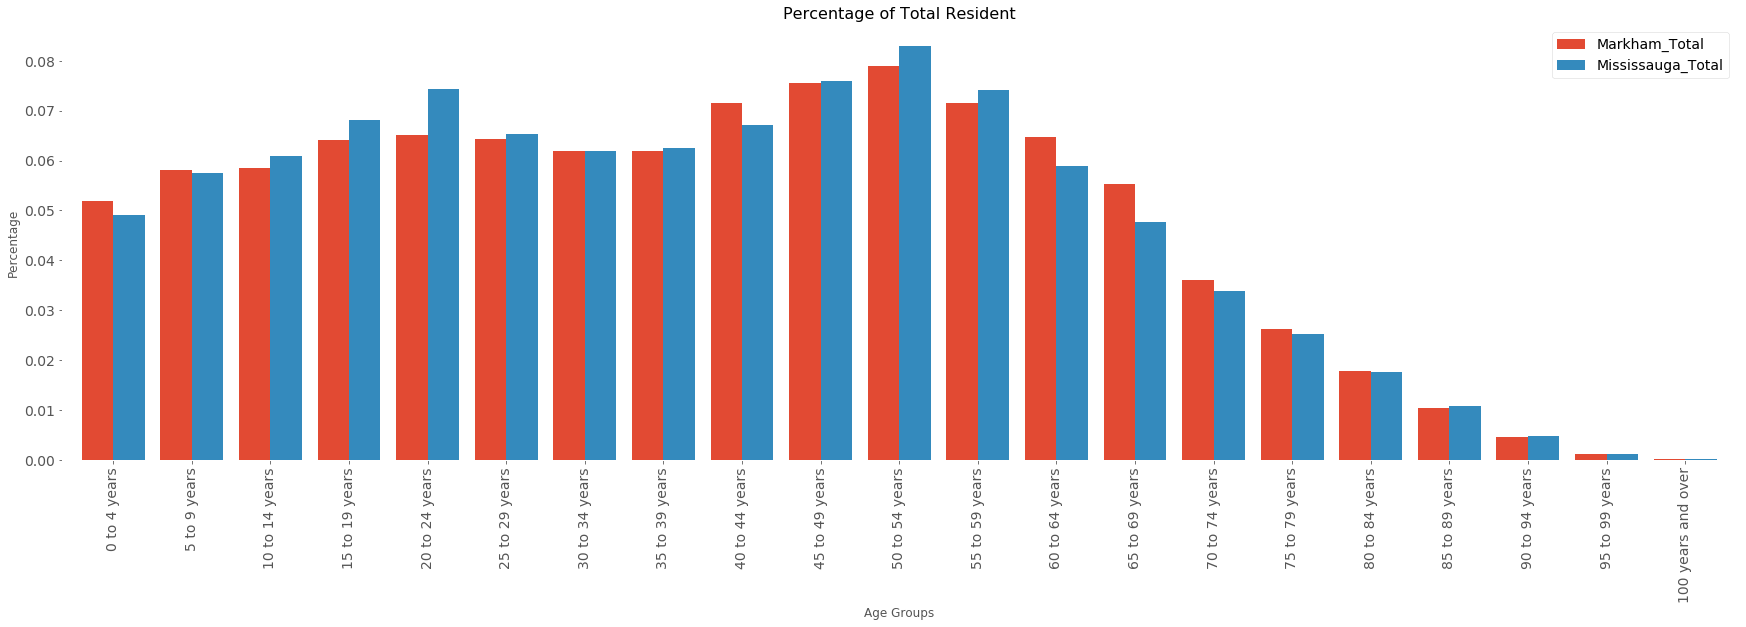

In [21]:
# Build a plot to show the comparision in bar chart

totalage_compare['Markham_Total']= totalage_compare['Markham_Total']/totalage_compare['Markham_Total'].sum()
totalage_compare['Mississauga_Total']= totalage_compare['Mississauga_Total']/totalage_compare['Mississauga_Total'].sum()

# Plotting
ax = totalage_compare.plot(kind='bar', 
                figsize=(30, 8),
                rot=90,
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Percentage of Total Resident',fontsize=16)
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percentage")

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 



plt.show()

In [22]:
# Create a dataframe which have the total number of female in different age groups for both Markham and Mississauga

age_f = pd.merge(df_markham.loc[(df_markham['Category']=='Age characteristics'),['Sub_Category','Female']], df_miss.loc[(df_miss['Category']=='Age characteristics'),['Sub_Category','Female']], on='Sub_Category', how='left')
fage_compare = age_f.rename(columns = {
        "Sub_Category": "Age Group",
        "Female_x": "Markham_f", 
        "Female_y":"Mississauga_f",
                                  }) 
fage_compare.set_index(['Age Group'], inplace=True)
fage_compare

,Markham_f,Mississauga_f
Age Group,,
0 to 4 years,8370.0,17585.0
5 to 9 years,9180.0,20270.0
10 to 14 years,9270.0,21180.0
15 to 19 years,10185.0,23535.0
20 to 24 years,10230.0,25850.0
25 to 29 years,10460.0,23460.0
30 to 34 years,10550.0,23175.0
35 to 39 years,11035.0,24390.0
40 to 44 years,12745.0,26060.0


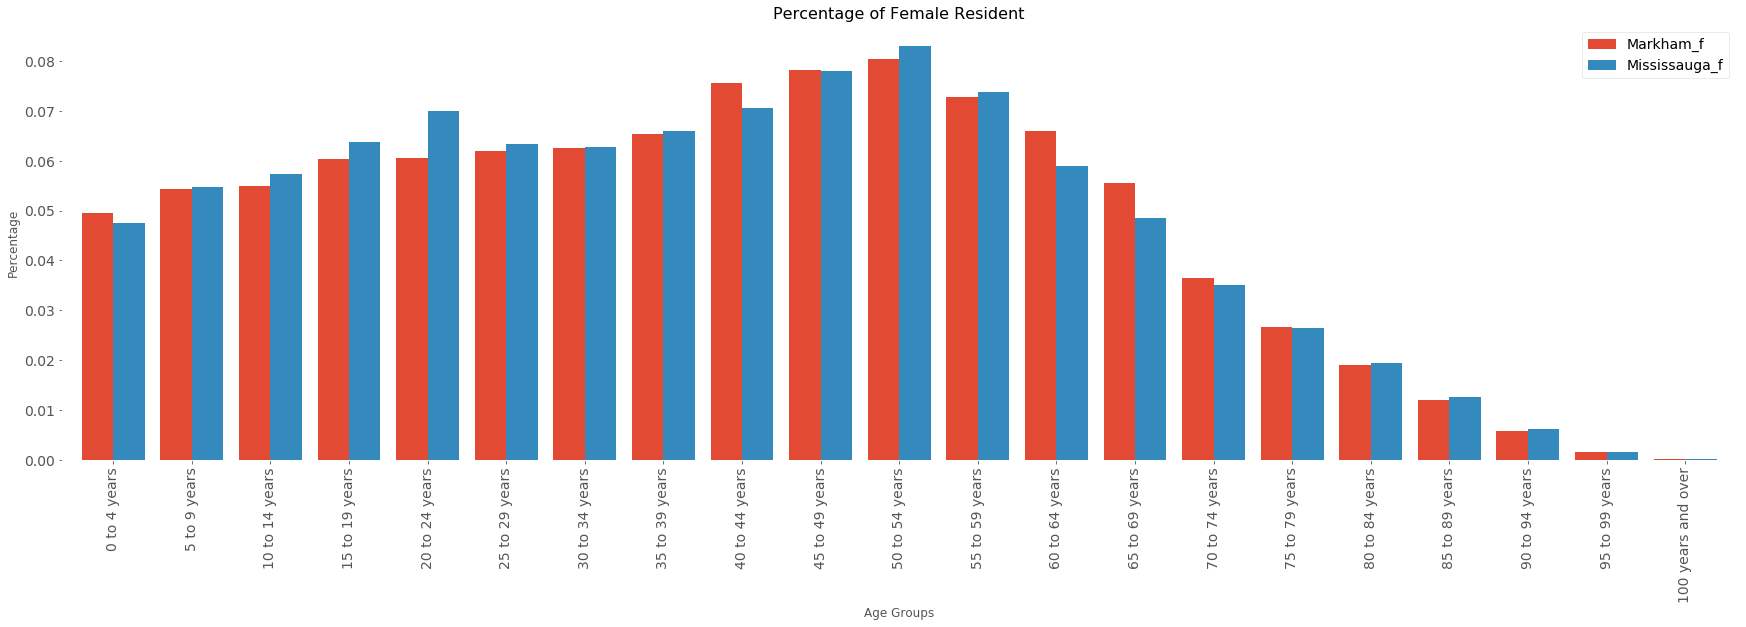

In [23]:
# Build a plot to show the comparision in bar chart

fage_compare['Markham_f']= fage_compare['Markham_f']/fage_compare['Markham_f'].sum()
fage_compare['Mississauga_f']= fage_compare['Mississauga_f']/fage_compare['Mississauga_f'].sum()

# Plotting
ax = fage_compare.plot(kind='bar', 
                figsize=(30, 8),
                rot=90,
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Percentage of Female Resident',fontsize=16)
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percentage")

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 



plt.show()

After exploring the age distribution data in both Markham and Mississauga, we can see that Mississauga has larger population than Markham. Let's assume the target customer will fall under 25-40 who has the power of shopping and have higher chance to do international shipping and shopping. Also considering there are major differences between female and male in shopping habit and buying decisions and female tend to do shopping more often than male, and they usually take care of the grocery. Mississauga has a slightly higher percentage than Markham, but not major difference.

### 3.2 Crime Rate Analysis between two cities

In [24]:
# The crime category in two city's report is different. So based on the commonality i observe from the two dataframe, the follow new dataframe has been created for analysis.
# For the analysis, i will use 2017 data to compare between Markham and Mississauga

from pandas import DataFrame
data = {'Category': ['Crimes Against Persons','Crimes Against Property','Other Criminal Code Offences','Drugs','Traffic Offences'],
        'Mississauga': [3876,14135,2233,1201,2778],
        'Markham': [1598,4614,595,574,1077]
        }

crime_compare = DataFrame(data, columns= ['Category', 'Mississauga','Markham'])
crime_compare .set_index(['Category'], inplace=True)
crime_compare

,Mississauga,Markham
Category,,
Crimes Against Persons,3876,1598
Crimes Against Property,14135,4614
Other Criminal Code Offences,2233,595
Drugs,1201,574
Traffic Offences,2778,1077


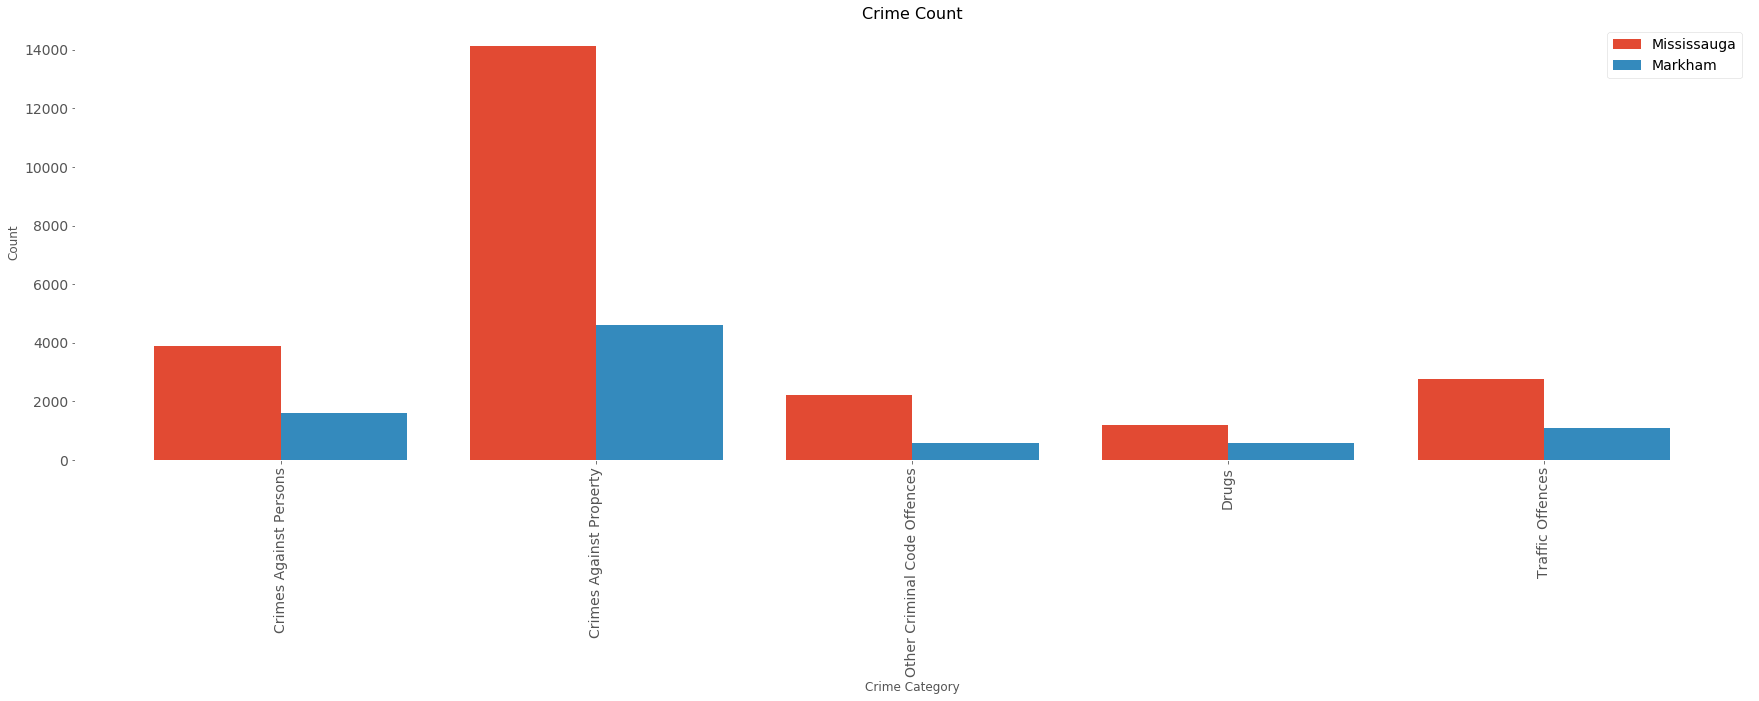

In [25]:
# Build a plot to show the comparision in bar chart

ax = crime_compare.plot(kind='bar', 
                figsize=(30, 8),
                rot=90,
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Crime Count',fontsize=16)
ax.set_xlabel("Crime Category")
ax.set_ylabel("Count")

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 



plt.show()

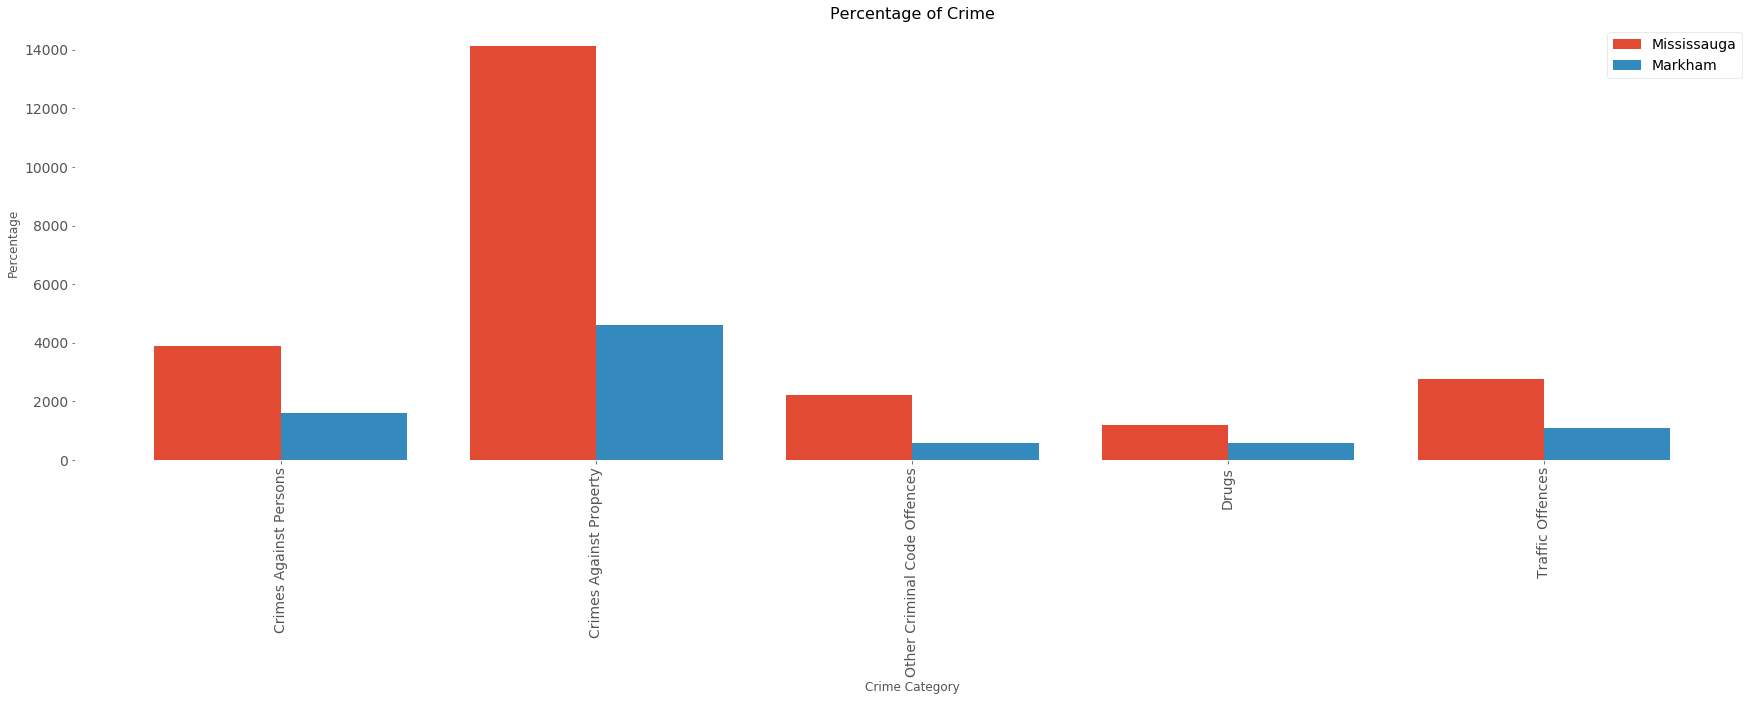

In [26]:
# Build a plot to show the comparision in bar chart

crime_compare['Markham']= crime_compare['Markham']/totalage_compare['Markham_Total'].sum()
crime_compare['Mississauga']= crime_compare['Mississauga']/totalage_compare['Mississauga_Total'].sum()

# Plotting
ax = crime_compare.plot(kind='bar', 
                figsize=(30, 8),
                rot=90,
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Percentage of Crime',fontsize=16)
ax.set_xlabel("Crime Category")
ax.set_ylabel("Percentage")

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 



plt.show()

From above visulization we can tell that Mississauga has a higher count of the crime happend in 2017 than Markham, in all of the crime category (as shown above). but consider the population difference between the two cities, another chart was plotted based on the % among total resident in two cities. From the chart we can see Mississauga has a higher percentage of crime rate among the total popluation, and the "Crimes Against Property" which is more related to the safety to a budiling / inventory has the most difference. So Markham will consider as a better choice when talks to safety concern.

### 3.3 Visible minority population

In [27]:
# Create a dataframe which have the total number of visible minority poplation  in different age groups for both Markham and Mississauga

vm_total = pd.merge(df_markham.loc[(df_markham['Category']=='Visible minority population'),'Sub_Category':'Total'], df_miss.loc[(df_miss['Category']=='Visible minority population'),'Sub_Category':'Total'], on='Sub_Category', how='left')
totalvm_compare = vm_total.rename(columns = {
        "Sub_Category": "Visible minority population",
        "Total_x": "Markham_Total", 
        "Total_y":"Mississauga_Total",
                                  }) 
totalvm_compare.set_index(['Visible minority population'], inplace=True)
totalvm_compare

,Markham_Total,Mississauga_Total
Visible minority population,,
South Asian,58270,165765
Chinese,147725,54090
Black,9655,47005
Filipino,8905,36570
Latin American,1750,16110
Arab,3250,36200
Southeast Asian,2520,14795
West Asian,7910,7910
Korean,4355,6095


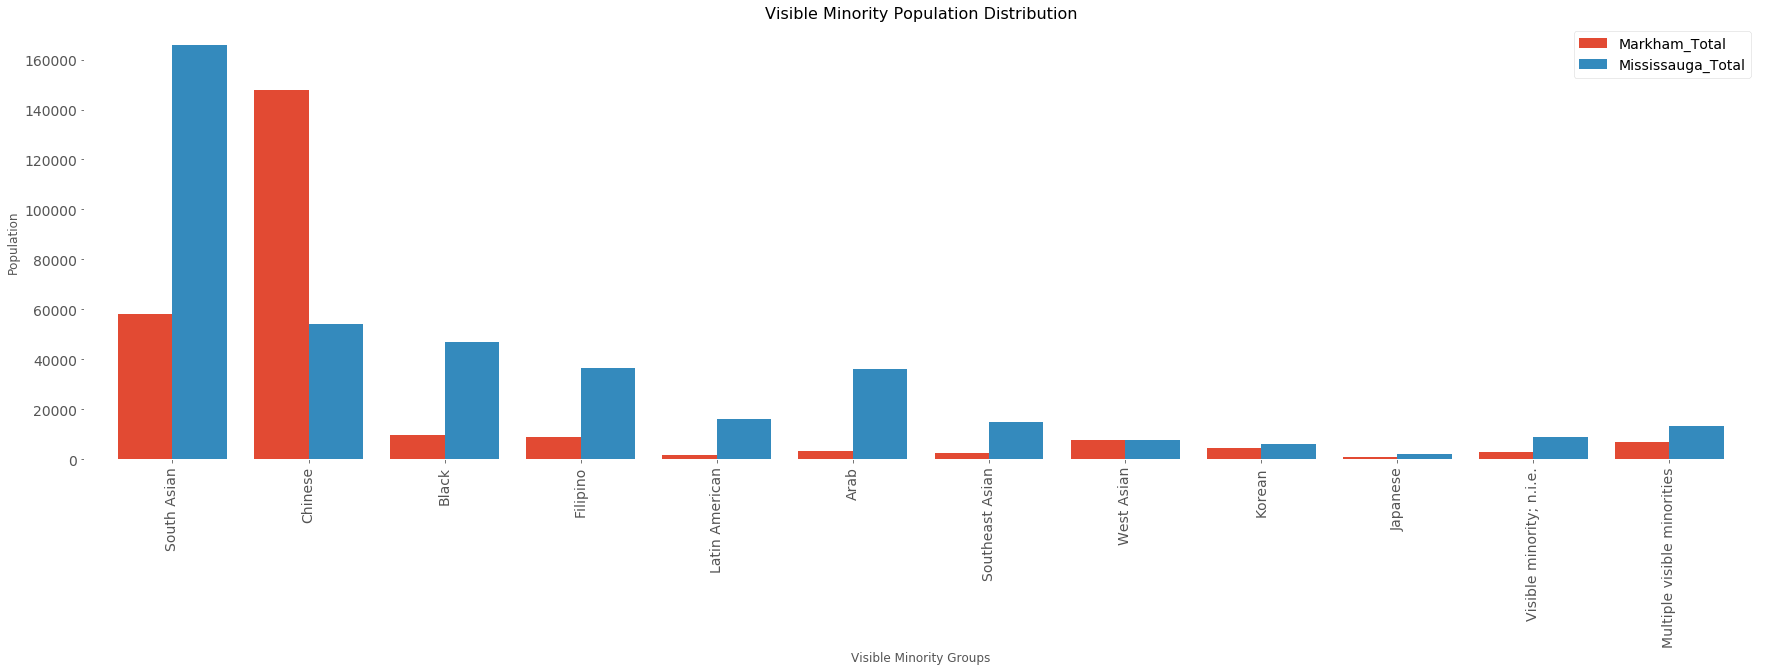

In [28]:
# Plotting
ax = totalvm_compare.plot(kind='bar', 
                figsize=(30, 8),
                rot=90,
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Visible Minority Population Distribution',fontsize=16)
ax.set_xlabel("Visible Minority Groups")
ax.set_ylabel("Population")

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 



plt.show()

After exploring the visible minority population data in both Markham and Mississauga, we can see that Markham has much higher Chinese population than Mississauga. Thinking that the company is a China-based Express Delivery company and want to mainly focus on Canada – China international business, Markham seems a better city to choose.

### 3.4 Household Income 2015

In [29]:
# Create a dataframe which have the total number of people fall in different household income range for both Markham and Mississauga

income_total = pd.merge(df_markham.loc[(df_markham['Category']=='Income of households in 2015'),'Sub_Category':'Total'], df_miss.loc[(df_miss['Category']=='Income of households in 2015'),'Sub_Category':'Total'], on='Sub_Category', how='left')
income_compare = income_total.rename(columns = {
        "Sub_Category": "Income Group",
        "Total_x": "Markham_Total", 
        "Total_y":"Mississauga_Total",
                                  }) 
income_compare.set_index(['Income Group'], inplace=True)
income_compare

,Markham_Total,Mississauga_Total
Income Group,,
Under $5;000,2280,4765
$5;000 to $9;999,1295,2665
$10;000 to $14;999,1780,4320
$15;000 to $19;999,2615,6755
$20;000 to $24;999,2805,7805
$25;000 to $29;999,3660,8340
$30;000 to $34;999,3820,9050
$35;000 to $39;999,3850,9975
$40;000 to $44;999,4010,10700


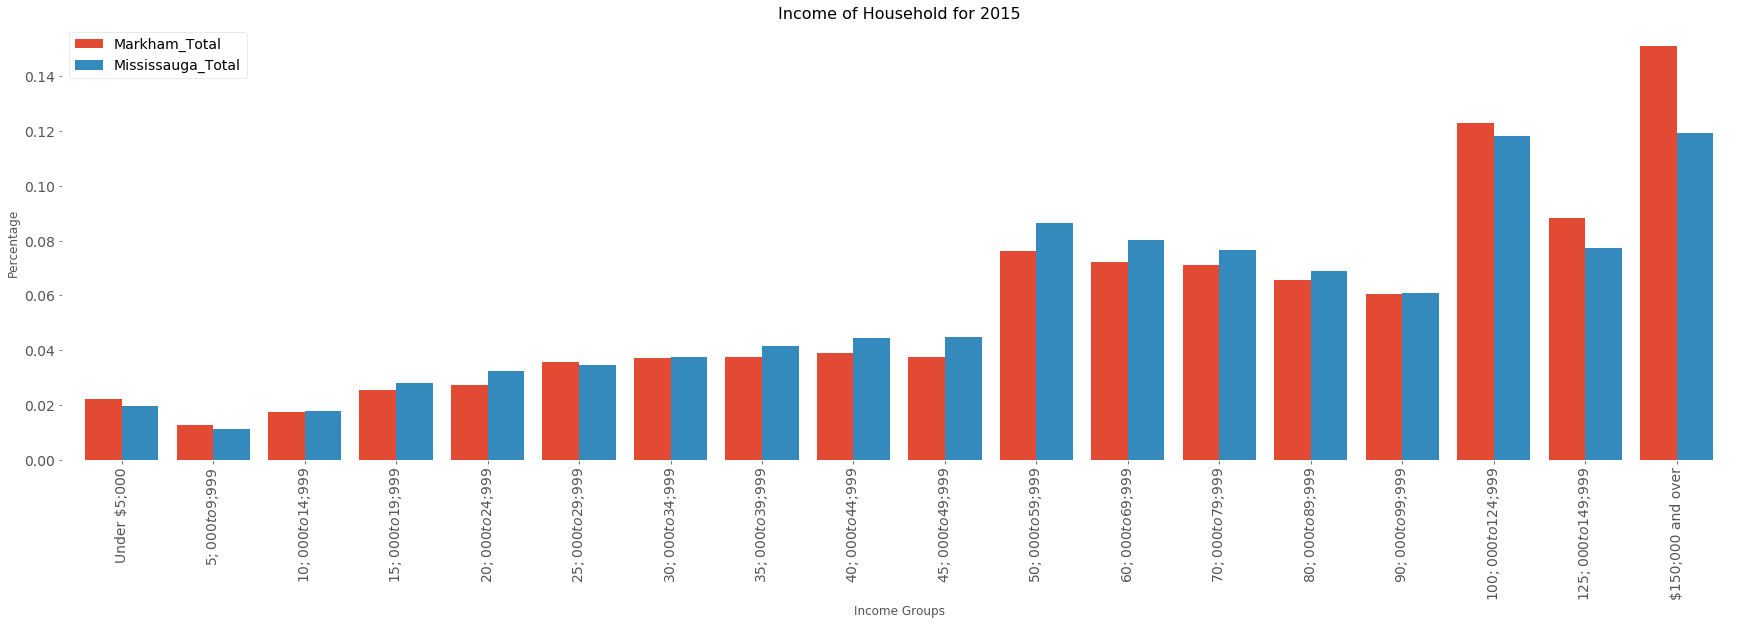

In [30]:
# Build a plot to show the comparision in bar chart

income_compare['Markham_Total']= income_compare['Markham_Total']/income_compare['Markham_Total'].sum()
income_compare['Mississauga_Total']= income_compare['Mississauga_Total']/income_compare['Mississauga_Total'].sum()

# Plotting
ax = income_compare.plot(kind='bar', 
                figsize=(30, 8),
                rot=90,
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Income of Household for 2015',fontsize=16)
ax.set_xlabel("Income Groups")
ax.set_ylabel("Percentage")

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 



plt.show()

### 3.5 FourSquare API City Explore - Competitor

#### 3.5.1 Markham

In [31]:
address = 'Markham, Ontario'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_markham = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighbourhood in zip(pc_markham['Latitude'], pc_markham['Longitude'], pc_markham['Borough'], pc_markham['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_markham)  
    
map_markham

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


In [32]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: EOQZ5QGTB5IB0CL5JGVLEFUY5T4QEPQODIQC0GUYKRAZFJCF
CLIENT_SECRET:ZAI1EJPX5QEFPSUGR3DF2GZ404HUNETZQ3KGBLYRXEXFQHAQ


In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        
        # create the API request URL which only return the venues in "Post Office"
        # categoryId:4bf58dd8d48988d172941735 >> Post Office
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId=4bf58dd8d48988d172941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            limit
           )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
venues_markham = getNearbyVenues(names=pc_markham['Neighbourhood'],
                                   latitudes=pc_markham['Latitude'],
                                   longitudes=pc_markham['Longitude']
                                  )

Berczy Village, Cachet, Angus Glen, Cathedraltown, Victoria Square
Markham Southeast, Armadale, Legacy, Rouge Fairways, Middlefield, Cedarwood
Outer Southwest, Crosby, Milliken Mills, Brown's Corners, Buttonville, Hagerman's Corners, Uptown Markham, South Unionville
Central, Markham Village, Mount Joy, Bullock, Dickson's Hill, Raymerville, Markville East, Sherwood, Amber Glen, Milnesville, Quantztown, Vinegar Hill
Downtown Markham, Markham Centre
Wismer Commons, Greensborough
Almira, Box Grove, Cornell, Cedar Grove, Unionville
Thornhill, German Mills


In [35]:
venues_markham

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Canada Post,43.885945,-79.370169,Post Office
1,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Canada Post,43.894390,-79.291939,Post Office
2,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Canada Post,43.869254,-79.361142,Post Office
3,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,FedEx,43.828630,-79.256868,Post Office
4,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,The UPS Store,43.871893,-79.268561,Post Office
5,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,Milliken Wells Post Office,43.825305,-79.277463,Post Office
6,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,Canada Post,43.833413,-79.306280,Post Office
7,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,Post Office at Rexall Pharma Plus,43.867499,-79.228999,Post Office
8,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,Loomis Express / DHL,43.835784,-79.315711,Post Office
9,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,Canada Post,43.840047,-79.322535,Post Office


In [36]:
venues_markham['Venue'].unique()

array(['Canada Post', 'FedEx', 'The UPS Store',
       'Milliken Wells Post Office', 'Post Office at Rexall Pharma Plus',
       'Loomis Express / DHL', 'Rexall', 'Purolator Shipping Centre',
       'Postnet', 'Canada Post Drive-Thru Parcel Centre',
       'Shoppers Drug Mart'], dtype=object)

#### 3.5.2 Mississauga Explore

In [37]:
address = 'Mississauga, Ontario'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_mississauga = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighbourhood in zip(pc_mississauga['Latitude'], pc_mississauga['Longitude'], pc_mississauga['Borough'], pc_mississauga['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mississauga)  
    
map_mississauga

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


In [38]:
venues_mississauga = getNearbyVenues(names=pc_mississauga['Neighbourhood'],
                                   latitudes=pc_mississauga['Latitude'],
                                   longitudes=pc_mississauga['Longitude']
                                  )

Mississauga Valley, East Cooksville
WestCooksville, Fairview, City Centre, EastCreditview
WestCreditview, Mavis, Erindale
Central Lakeview
SWLakeview, Mineola, EastPort Credit
West Port Credit, Lorne Park, EastSheridan
Clarkson, Southdown
West Sheridan
Erin Mills, Western Business Park
Churchill Meadows, Central Erin Mills, SouthStreetsville
Lisgar, Meadowvale
YYZ
West Hurontario, SW Gateway
Cardiff, NEGateway
Courtney Park, EastGateway
Malton
Wildwood
East Credit
Matheson, EastRathwood
Meadowvale Village, WestGateway
East Applewood, East Dixie, NELakeview
WestApplewood, West Dixie, NWLakeview
West Rathwood, East Hurontario, SE Gateway, Sandalwood


In [39]:
venues_mississauga

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Mississauga Valley, East Cooksville",43.588405,-79.609455,Canada Post,43.593396,-79.644406,Post Office
1,"Mississauga Valley, East Cooksville",43.588405,-79.609455,Canada Post,43.581112,-79.648695,Post Office
2,"Mississauga Valley, East Cooksville",43.588405,-79.609455,Fedex,43.604990,-79.574146,Post Office
3,"Mississauga Valley, East Cooksville",43.588405,-79.609455,Canada Post,43.598677,-79.660621,Post Office
4,"Mississauga Valley, East Cooksville",43.588405,-79.609455,Shoppers Drug Mart,43.625522,-79.604745,Pharmacy
5,"WestCooksville, Fairview, City Centre, EastCre...",43.578945,-79.632699,Canada Post,43.581112,-79.648695,Post Office
6,"WestCooksville, Fairview, City Centre, EastCre...",43.578945,-79.632699,Canada Post,43.593396,-79.644406,Post Office
7,"WestCooksville, Fairview, City Centre, EastCre...",43.578945,-79.632699,Canada Post,43.598677,-79.660621,Post Office
8,"WestCooksville, Fairview, City Centre, EastCre...",43.578945,-79.632699,UPS Store #14,43.615095,-79.661122,Post Office
9,"WestCreditview, Mavis, Erindale",43.562932,-79.651714,Canada Post,43.581112,-79.648695,Post Office


In [40]:
venues_mississauga['Venue'].unique()

array(['Canada Post', 'Fedex', 'Shoppers Drug Mart', 'UPS Store #14',
       'Canpar', 'Quinn Stationary & Gifts', 'The UPS store',
       'UPS Store #365', 'FedEx Ground Warehouse', 'The Supply Room',
       'Canada Post - Gateway', "Kim's Convenience",
       'AB Global Logistics', 'Sterling Logistics',
       'Purolator Shipping Centre'], dtype=object)

#### 3.5.3 Comparison

From the exploring data above between Markham and Mississauga, we can tell in both cities, the common "big" brand post office like "Canada Post", "Fedex", "UPS", etc. is accessible to the resident. So from a "No or less competitor" perspective, two cities are similar to each other. The company will need to work on the target customer so they can earn more from the customer.

## 4. Result

### 4.1 Markham vs Mississauga

Let's combine all the data exploring result in a simple table to help us better understand the result:

In [41]:
# Create a dataframe to combine the data exploring result together
# Based on the above section, decide the "winner"

data_compare = {'Methodology Category': ['Age Group Distribution','Crime Rate','Visible Minority Population','Household Income','Competitor Around'],
        '"Winner"': ['Mississauga','Markham','Markham','Markham','Both']
        }

data_compare = DataFrame(data_compare, columns= ['Methodology Category', '"Winner"'])
data_compare .set_index(['Methodology Category'], inplace=True)
data_compare

,"""Winner"""
Methodology Category,
Age Group Distribution,Mississauga
Crime Rate,Markham
Visible Minority Population,Markham
Household Income,Markham
Competitor Around,Both


We can see from the above table: First, when it comes to the total population reside in both Markham and Mississauga, Mississauga Mississauga has a slightly higher percentage of population who is within 25-40 age (from both total count and only count female residents) than Markham. However, we can also tell from the bar chart that the differenence is not material. Second, when we compare the crime rate (data as of 2017) between both Markham and Mississauga, we can see thatMississauga has a higher percentage of crime rate among the total popluation (, So Markham will consider as a better choice when talks to safety concern. Next, from a visible minority popluation perspective, as we already know the company is a China-based company and the main focus of their service / product will be Canada - China express delivery, it make more sense for them to place the new branch in the city which has the higher population of Chinese people, which in this case will be Markham. Furthermore, if we take a look into the general household income for 2015, we can see Markham has a higher population distribution % among the "<10k" and ">100k" group, while Mississauga has a higher population distribution % between "10k - 100k". Last but not least, both cities have the common "big" brand post office like "Canada Post", "Fedex", "UPS", etc. is accessible to the resident. So from a "No or less competitor" perspective, two cities are similar to each other. I

In conclusion, Markham will be a better choice for the company to place the first branch.

### 4.2 Explore Markham

In [42]:
def getNearbyVenues_m(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        
        # create the API request URL which only return the venues in Markham
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit,
           )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_m = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_m.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_m)

In [43]:
venues_markham_new = getNearbyVenues_m(names=pc_markham['Neighbourhood'],
                                   latitudes=pc_markham['Latitude'],
                                   longitudes=pc_markham['Longitude']
                                  )

Berczy Village, Cachet, Angus Glen, Cathedraltown, Victoria Square
Markham Southeast, Armadale, Legacy, Rouge Fairways, Middlefield, Cedarwood
Outer Southwest, Crosby, Milliken Mills, Brown's Corners, Buttonville, Hagerman's Corners, Uptown Markham, South Unionville
Central, Markham Village, Mount Joy, Bullock, Dickson's Hill, Raymerville, Markville East, Sherwood, Amber Glen, Milnesville, Quantztown, Vinegar Hill
Downtown Markham, Markham Centre
Wismer Commons, Greensborough
Almira, Box Grove, Cornell, Cedar Grove, Unionville
Thornhill, German Mills


In [44]:
venues_markham_new

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Angus Glen Golf Club,43.902117,-79.324863,Golf Course
1,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Angus Glen Community Centre & Library,43.894548,-79.335758,Community Center
2,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Toogood Pond,43.870701,-79.313803,Park
3,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Old Firehall Confectionary,43.867126,-79.312084,Dessert Shop
4,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Wonton Chai Noodle 雲吞仔,43.885312,-79.372231,Asian Restaurant
5,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Main Street,43.867774,-79.311948,Road
6,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Cosmo Music - The Musical Instrument Superstore!,43.890410,-79.393270,Music Store
7,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Next Door,43.865531,-79.310234,New American Restaurant
8,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,Old Country Inn,43.867994,-79.312518,German Restaurant
9,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,The Village Grocer,43.880428,-79.316675,Grocery Store


In [45]:
venues_markham_new.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Almira, Box Grove, Cornell, Cedar Grove, Unionville",11,11,11,11,11,11
"Berczy Village, Cachet, Angus Glen, Cathedraltown, Victoria Square",80,80,80,80,80,80
"Central, Markham Village, Mount Joy, Bullock, Dickson's Hill, Raymerville, Markville East, Sherwood, Amber Glen, Milnesville, Quantztown, Vinegar Hill",80,80,80,80,80,80
"Downtown Markham, Markham Centre",100,100,100,100,100,100
"Markham Southeast, Armadale, Legacy, Rouge Fairways, Middlefield, Cedarwood",100,100,100,100,100,100
"Outer Southwest, Crosby, Milliken Mills, Brown's Corners, Buttonville, Hagerman's Corners, Uptown Markham, South Unionville",100,100,100,100,100,100
"Thornhill, German Mills",100,100,100,100,100,100
"Wismer Commons, Greensborough",100,100,100,100,100,100


In [46]:
# one hot encoding
markham_onehot = pd.get_dummies(venues_markham_new[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
markham_onehot['Neighbourhood'] = venues_markham_new['Neighbourhood'] 

cols=list(markham_onehot.columns.values)
cols.pop(cols.index('Neighbourhood'))
markham_onehot=markham_onehot[['Neighbourhood']+cols]

markham_onehot.rename(columns = {'Neighbourhood': 'Neighbourhood'}, inplace = True)
markham_onehot.head()

,Neighbourhood,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,...,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Train Station,Tree,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wings Joint,Yoga Studio
0,"Berczy Village, Cachet, Angus Glen, Cathedralt...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Berczy Village, Cachet, Angus Glen, Cathedralt...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Berczy Village, Cachet, Angus Glen, Cathedralt...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Berczy Village, Cachet, Angus Glen, Cathedralt...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Berczy Village, Cachet, Angus Glen, Cathedralt...",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
markham_grouped = markham_onehot.groupby('Neighbourhood').mean().reset_index()
markham_grouped

,Neighbourhood,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,...,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Train Station,Tree,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wings Joint,Yoga Studio
0,"Almira, Box Grove, Cornell, Cedar Grove, Union...",0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.00,0.0000,0.00,...,0.0000,0.0000,0.00,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.00
1,"Berczy Village, Cachet, Angus Glen, Cathedralt...",0.0125,0.0000,0.0125,0.0125,0.00,0.00,0.00,0.0000,0.00,...,0.0000,0.0125,0.00,0.0000,0.0125,0.00,0.0250,0.0125,0.0125,0.00
2,"Central, Markham Village, Mount Joy, Bullock, ...",0.0000,0.0125,0.0000,0.0125,0.00,0.00,0.00,0.0125,0.00,...,0.0125,0.0000,0.00,0.0125,0.0000,0.00,0.0125,0.0000,0.0000,0.00
3,"Downtown Markham, Markham Centre",0.0000,0.0100,0.0000,0.0200,0.00,0.00,0.01,0.0300,0.00,...,0.0200,0.0000,0.01,0.0000,0.0000,0.02,0.0100,0.0000,0.0000,0.01
4,"Markham Southeast, Armadale, Legacy, Rouge Fai...",0.0000,0.0100,0.0000,0.0300,0.01,0.00,0.01,0.0100,0.00,...,0.0000,0.0000,0.01,0.0000,0.0000,0.03,0.0000,0.0100,0.0000,0.01
5,"Outer Southwest, Crosby, Milliken Mills, Brown...",0.0000,0.0100,0.0000,0.0200,0.00,0.00,0.01,0.0300,0.00,...,0.0100,0.0000,0.00,0.0000,0.0000,0.02,0.0100,0.0000,0.0000,0.00
6,"Thornhill, German Mills",0.0000,0.0000,0.0000,0.0100,0.00,0.01,0.00,0.0100,0.02,...,0.0300,0.0000,0.00,0.0000,0.0000,0.01,0.0200,0.0000,0.0100,0.01
7,"Wismer Commons, Greensborough",0.0000,0.0100,0.0000,0.0200,0.01,0.00,0.00,0.0100,0.00,...,0.0000,0.0000,0.01,0.0100,0.0000,0.01,0.0200,0.0000,0.0200,0.01


In [48]:
# list top 5 venues in each neighbourhood
num_top_venues = 5

for hood in markham_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = markham_grouped[markham_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Almira, Box Grove, Cornell, Cedar Grove, Unionville----
            venue  freq
0            Park  0.27
1     Coffee Shop  0.18
2            Bank  0.18
3     Golf Course  0.09
4  Farmers Market  0.09


----Berczy Village, Cachet, Angus Glen, Cathedraltown, Victoria Square----
                  venue  freq
0           Coffee Shop  0.08
1                  Bank  0.06
2        Sandwich Place  0.05
3           Golf Course  0.04
4  Fast Food Restaurant  0.04


----Central, Markham Village, Mount Joy, Bullock, Dickson's Hill, Raymerville, Markville East, Sherwood, Amber Glen, Milnesville, Quantztown, Vinegar Hill----
                  venue  freq
0           Coffee Shop  0.08
1        Sandwich Place  0.06
2           Pizza Place  0.06
3                  Bank  0.05
4  Fast Food Restaurant  0.05


----Downtown Markham, Markham Centre----
                 venue  freq
0   Chinese Restaurant  0.05
1               Bakery  0.05
2                Hotel  0.04
3  Japanese Restaurant  0.04
4      Bub

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
# create a new dataframe with top 10 most common venue under each neighbourhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = markham_grouped['Neighbourhood']

for ind in np.arange(markham_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(markham_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Almira, Box Grove, Cornell, Cedar Grove, Union...",Park,Bank,Coffee Shop,Community Center,Golf Course,Farmers Market,Garden Center,Yoga Studio,Fast Food Restaurant,Farm
1,"Berczy Village, Cachet, Angus Glen, Cathedralt...",Coffee Shop,Bank,Sandwich Place,Pizza Place,Golf Course,Fast Food Restaurant,Pharmacy,Breakfast Spot,Dessert Shop,Vietnamese Restaurant
2,"Central, Markham Village, Mount Joy, Bullock, ...",Coffee Shop,Pizza Place,Sandwich Place,Bank,Fast Food Restaurant,Pharmacy,Sushi Restaurant,Farm,Café,Fried Chicken Joint
3,"Downtown Markham, Markham Centre",Chinese Restaurant,Bakery,Hotel,Bubble Tea Shop,Dessert Shop,Japanese Restaurant,BBQ Joint,Noodle House,Caribbean Restaurant,Thai Restaurant
4,"Markham Southeast, Armadale, Legacy, Rouge Fai...",Bakery,Chinese Restaurant,Bubble Tea Shop,Noodle House,Dessert Shop,Indian Restaurant,Hakka Restaurant,Italian Restaurant,Supermarket,Asian Restaurant
5,"Outer Southwest, Crosby, Milliken Mills, Brown...",Bakery,Chinese Restaurant,Japanese Restaurant,Dessert Shop,Caribbean Restaurant,Tea Room,Gym,Hotel,Noodle House,BBQ Joint
6,"Thornhill, German Mills",Coffee Shop,Korean Restaurant,Thai Restaurant,Breakfast Spot,Bubble Tea Shop,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Bakery,Dessert Shop
7,"Wismer Commons, Greensborough",Coffee Shop,Bank,Sandwich Place,Fast Food Restaurant,Grocery Store,Cosmetics Shop,Pharmacy,Park,Seafood Restaurant,Breakfast Spot


In [51]:
from sklearn.cluster import KMeans 

# set number of clusters
kclusters = 5

markham_grouped_clustering = markham_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(markham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 4, 3, 3, 3, 2, 0], dtype=int32)

In [52]:
pc_markham

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,L6C,Markham,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338
1,L3S,Markham,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179
2,L3R,Markham,"Outer Southwest, Crosby, Milliken Mills, Brown...",43.831860,-79.328545
3,L3P,Markham,"Central, Markham Village, Mount Joy, Bullock, ...",43.929105,-79.273375
4,L6G,Markham,"Downtown Markham, Markham Centre",43.848375,-79.334748
5,L6E,Markham,"Wismer Commons, Greensborough",43.900415,-79.266374
6,L6B,Markham,"Almira, Box Grove, Cornell, Cedar Grove, Union...",43.925286,-79.211845
7,L3T,Markham,"Thornhill, German Mills",43.822515,-79.393656


In [53]:
markham_merged = pc_markham

# add clustering labels
markham_merged['Cluster Labels'] = kmeans.labels_

markham_merged = markham_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

markham_merged


,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,L6C,Markham,"Berczy Village, Cachet, Angus Glen, Cathedralt...",43.904525,-79.339338,1,Coffee Shop,Bank,Sandwich Place,Pizza Place,Golf Course,Fast Food Restaurant,Pharmacy,Breakfast Spot,Dessert Shop,Vietnamese Restaurant
1,L3S,Markham,"Markham Southeast, Armadale, Legacy, Rouge Fai...",43.849285,-79.269179,0,Bakery,Chinese Restaurant,Bubble Tea Shop,Noodle House,Dessert Shop,Indian Restaurant,Hakka Restaurant,Italian Restaurant,Supermarket,Asian Restaurant
2,L3R,Markham,"Outer Southwest, Crosby, Milliken Mills, Brown...",43.831860,-79.328545,4,Bakery,Chinese Restaurant,Japanese Restaurant,Dessert Shop,Caribbean Restaurant,Tea Room,Gym,Hotel,Noodle House,BBQ Joint
3,L3P,Markham,"Central, Markham Village, Mount Joy, Bullock, ...",43.929105,-79.273375,3,Coffee Shop,Pizza Place,Sandwich Place,Bank,Fast Food Restaurant,Pharmacy,Sushi Restaurant,Farm,Café,Fried Chicken Joint
4,L6G,Markham,"Downtown Markham, Markham Centre",43.848375,-79.334748,3,Chinese Restaurant,Bakery,Hotel,Bubble Tea Shop,Dessert Shop,Japanese Restaurant,BBQ Joint,Noodle House,Caribbean Restaurant,Thai Restaurant
5,L6E,Markham,"Wismer Commons, Greensborough",43.900415,-79.266374,3,Coffee Shop,Bank,Sandwich Place,Fast Food Restaurant,Grocery Store,Cosmetics Shop,Pharmacy,Park,Seafood Restaurant,Breakfast Spot
6,L6B,Markham,"Almira, Box Grove, Cornell, Cedar Grove, Union...",43.925286,-79.211845,2,Park,Bank,Coffee Shop,Community Center,Golf Course,Farmers Market,Garden Center,Yoga Studio,Fast Food Restaurant,Farm
7,L3T,Markham,"Thornhill, German Mills",43.822515,-79.393656,0,Coffee Shop,Korean Restaurant,Thai Restaurant,Breakfast Spot,Bubble Tea Shop,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Bakery,Dessert Shop


In [54]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(markham_merged['Latitude'], markham_merged['Longitude'], markham_merged['Neighbourhood'], markham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Discussion

Based on the analysis above, i will recommend the company to open their first international branch in Markham, considering it's safer neighbour enviroment and large Chinese resident population. We can also see from the map that Markham has an Airport and also it's has pretty advance public transportation network through the city. Also, always consider that the company mainly focuses on China - Canada international shipping so the Chinese populatio size plays a key part in the decistion fact.

## 6. Conclusion

In this report, I explored mutiple data for both Markham and Mississauga first. And then idetified from a population, crime infomation, geographical exploration perspective etc. and then based on the analysis result, provided the recommendation that Markham will be a better choice over Mississauga to be the location for the first international site. Those component can also be part of the consideration when company decide to open another branches in the future, or identifying their marketing strategy. Of course there are more component the company need to think of before they actually dertermine which location they will pick, but with the based of the anaysis in this report it should provide them a good solid starting point to continue the conversation.